# Исследование объявлений о продаже квартир

## Введение <a id="introduction"></a> 

### Бизнес-задача <a id="task"></a> 

На основе данных Яндекс.Недвижимости определить рыночную стоимость объектов недвижимости; построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность; установить, какие факторы влияют на ценообразование стоимости квартир.

### План работы <a id="schedule"></a> 

1. [Введение](#introduction)
    - [Бизнес-задача](#task)
    - [План работы](#schedule)
2. [Загрузка данных](#data_load)
    - [Импорт необходимых библиотек](#library_import)
    - [Загрузка данных](#data_loading)
    - [Обзор и описание данных](#data_description)
3. [Предобработка данных](#preprocessing)
    - [Обработка дубликатов](#duplicates)
    - [Подсчет пропусков](#gaps)
    - [Изменение типов данных](#data_types)
    - [Удаление выбивающихся значений](#removing_outliers)
    - [Новые столбцы](#new_columns)
    - [Итог](#preprocessing_result)
    - [Выводы](#preprocessing_conclusion)
4. [Исследовательский анализ данных](#data_analysis)
    - [Общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат](#hists_1)
    - [Высота потолков, этаж квартиры, тип этажа квартиры, количество этажей в доме](#hists_2)
    - [Расстояния до центра города в метрах, ближайшего аэропорта и ближайшего парка](#hists_3)
    - [Год, день и месяц публикации объявления](#hists_4)
    - [Сколько дней занимает продажа квартиры](#hists_5)
    - [Факторы влияющие на стоимость объекта ](#factors)
    - [Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений](#average_price)
    - [Средняя цена каждого километра квартир в Санкт-Петербурге](#Kilo_average_price_spb)
5. [Общий вывод](#conclusion)
    

## Загрузка данных <a id="data_load"></a>

### Импорт необходимых библиотек <a id="library_import"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных <a id="data_loading"></a> 

Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep= '\t')

### Обзор и описание данных <a id="data_description"></a> 

Данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

Выведем первые 20 строчек датафрейма data на экран.

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

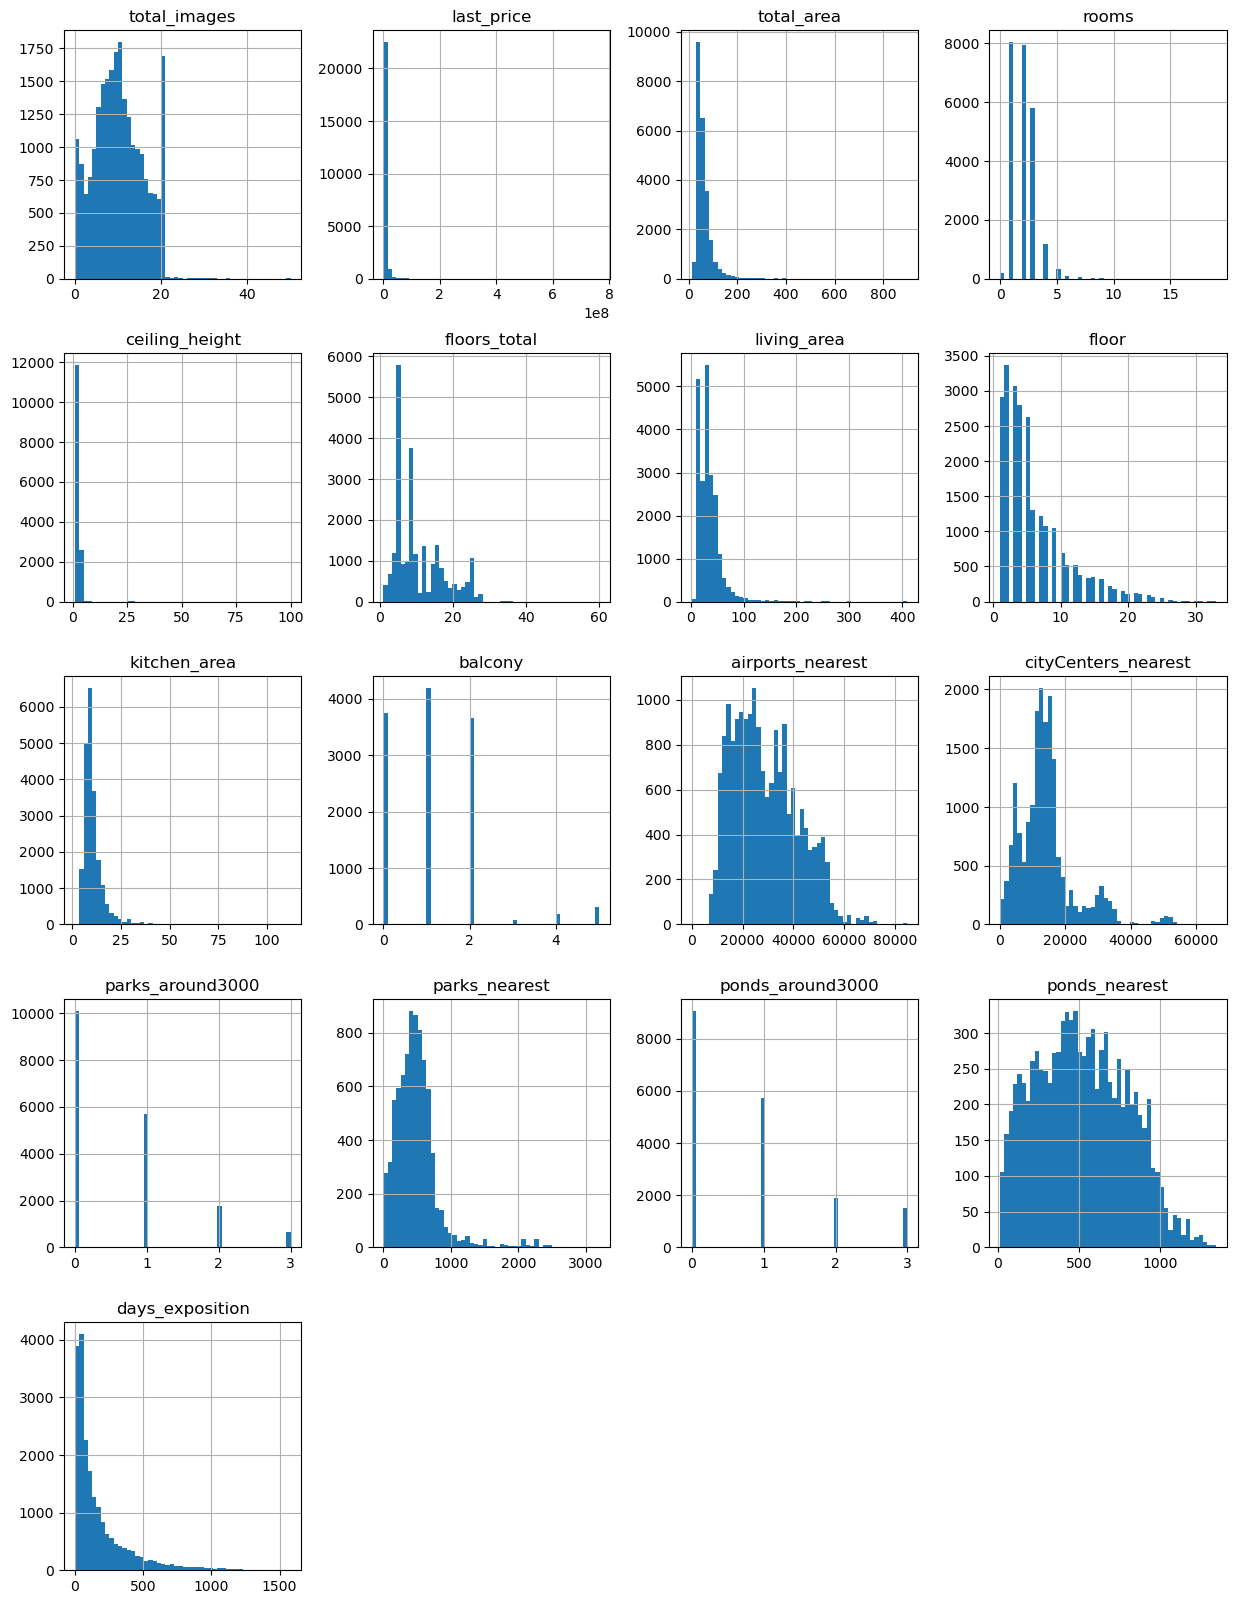

In [5]:
data.hist(figsize=(15, 20), bins = 50);

**Выводы**:
- Обнаружено множество пропусков в данных, которые понадобятся для исследования: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition
- На гистограммах можно заметить выбросы в данных, это также может помешать исследованию: last_price, total_area, rooms, ceiling_height, floors_total, living_area, kitchen_area, parks_nearest.

## Предобработка данных <a id="preprocessing"></a> 

### Обработка дубликатов <a id="duplicates"></a> 

Дубликатов в данных не обнаружено.

In [6]:
data.duplicated().sum()

0

Избавимся от неявных дубликатов:
- Удалим пропущенные значения;
- Заменим 'ё' на 'е';
- Замененим 'городской поселок' на 'поселок городского типа';
- Удалим слово 'деревня' в населенных пунктах, уже являющимися городами (Мурино, Кудрово, Никольское);
- Заменим название 'деревня Федоровское' на 'поселок городского типа Федоровское';

In [7]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data.loc[data['locality_name'] == 'Кудрово']['locality_name'].count()
data.loc[data['locality_name'] == 'деревня Кудрово']['locality_name'].count()
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data.loc[data['locality_name'] == 'Кудрово']['locality_name'].count()
data['locality_name'] = data['locality_name'].replace('деревня Мурино', 'Мурино')
data.loc[data['locality_name'] == 'Мурино']['locality_name'].count()
data['locality_name'] = data['locality_name'].replace('деревня Федоровское', 'поселок городского типа Федоровское')
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data = data.dropna(subset=['locality_name'])

### Подсчет пропусков <a id="gaps"></a> 

Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Проверим колличество пропусков в процентах для каждого столбца.

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Значения пропущены в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
Есть возможность полностью/частично заполнить/избавиться: balcony, is_apartment, locality_name, floors_total, ceiling_height, kitchen_area, living_area.

#### Пропуски в колонке balcony:

Предположительно, если в столбце balcony пропуск, это значит, что балкон скорее всего отсутствует. Заполним такие пропуски значением 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0) 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Пропуски в колонке is_apartment.

Столбец is_apartment заполняется одним из двух вариантов значений: False или True. Заполним все пропуски значением False.

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#### floors_total, ceiling_height, floor

Удалим строки с отсутствующими данными о количестве этажей в доме.

In [13]:
data = data.dropna(subset=['floors_total'])

Заполним пропуски в ceiling_height по медианным значениям floors_total.

In [14]:
for floor in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floor) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[data['floors_total'] == floor, 'ceiling_height'].median()

Остался еще одно пустое значение в ceiling_height для здания высотой 33 этажа, заполним его медианным значением для зданий выше 20 этажей.

In [15]:
data.loc[(data['floors_total'] == 33.0) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[data['floors_total'] > 20, 'ceiling_height'].median()

#### rooms, studio, kitchen_area, total_area и living_area

Пропущенные значения в столбце kitchen_area при условии, что комнат 0, замененим на 0. Остальные заменим средним по количеству комнат.

In [16]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [17]:
for amount in data['rooms'].unique():
    data.loc[(data['rooms'] == amount) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == amount), 'kitchen_area'].mean()

Пропущенные значения в living_area также замененим на среднее по количеству комнат.

In [18]:
for amount in data['rooms'].unique():
    data.loc[(data['rooms'] == amount) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == amount), 'living_area'].mean()

Удалим строки, где сумма жилой площади и площади кухни больше, чем общая площадь квартиры.

In [19]:
def chek_square(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    
    if total_area >= kitchen_area + living_area:
        return 'верно'
    else:
        return 'неверно'
    

data['chek_square'] = data.apply(chek_square, axis = 1)

data = data.loc[data['chek_square'] == 'верно']

### Изменение типов данных <a id="data_types"></a> 

Сменим тип данных в колонке first_day_exposition, это требуется для дальнейшей работы с данными о датах и времени.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Сменим типы данных в колонках balcony и floors_total, так как количества этажей и балконов могут быть только целыми числами.

In [21]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

### Удаление выбивающихся значений <a id="removing_outliers"></a> 

##### ceiling_height

Построим гистограмму и boxplot по столбцу ceiling_height.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

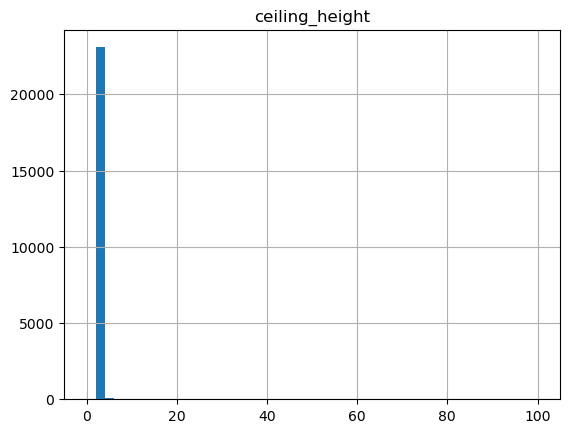

In [22]:
data.hist('ceiling_height', bins = 50, range = (0, 100))

<Axes: >

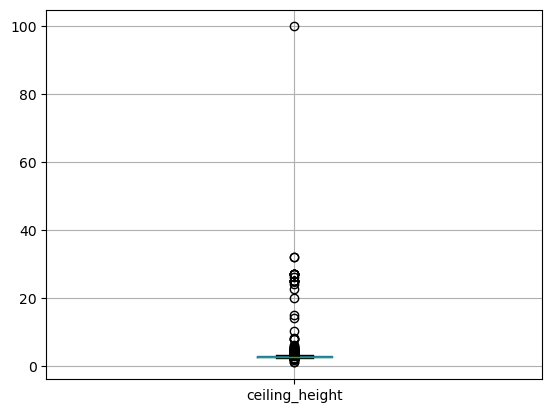

In [23]:
data.boxplot(column='ceiling_height')

Удалим значения меньше 24 и больше 5 метров, а также значения больше 24 метров поделим на 10.

In [24]:
data = data.loc[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 50)]
data = data.loc[(data['ceiling_height'] < 5) | (data['ceiling_height'] > 24)]
data.loc[data['ceiling_height'] > 24, 'ceiling_height'] = data.loc[data['ceiling_height'] > 24, 'ceiling_height'] / 10

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

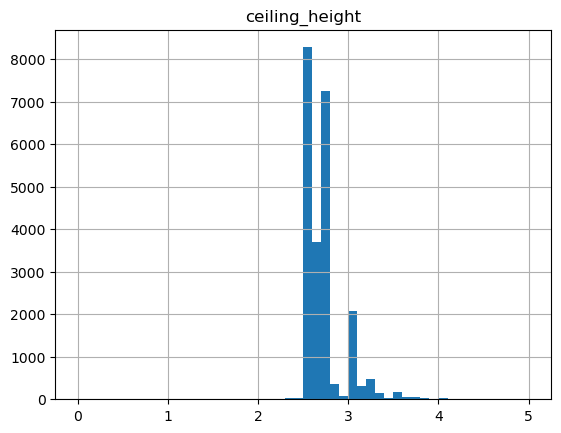

In [25]:
data.hist('ceiling_height', bins = 50, range = (0, 5))

<Axes: >

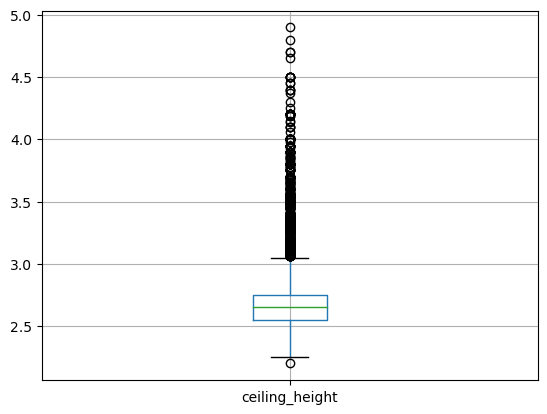

In [26]:
data.boxplot(column='ceiling_height')

##### last_price

Построим гистограмму и boxplot по столбцу last_price.

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

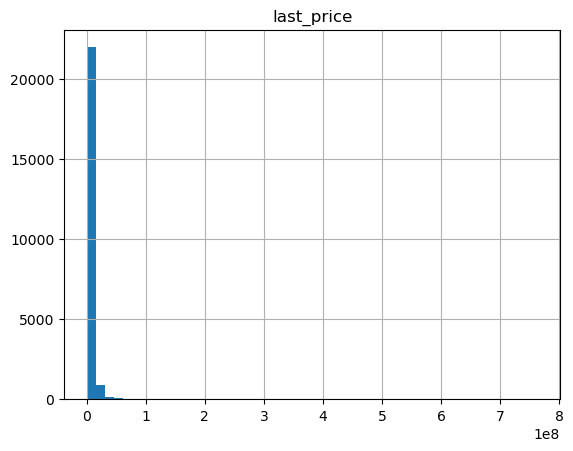

In [27]:
data.hist('last_price', bins = 50)

<Axes: >

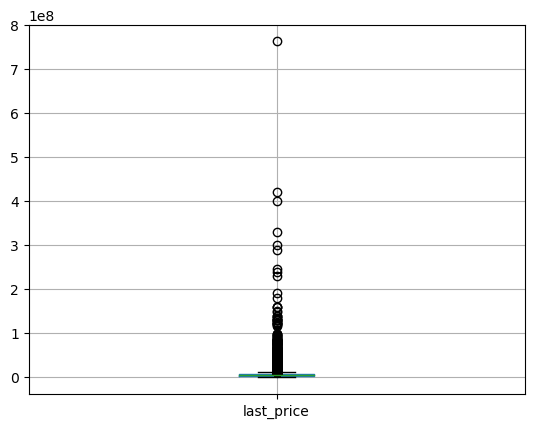

In [28]:
data.boxplot(column = 'last_price')

Удалим все строки, где last_price больше 30000000.

In [29]:
data = data.loc[data['last_price'] < 30000000]

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

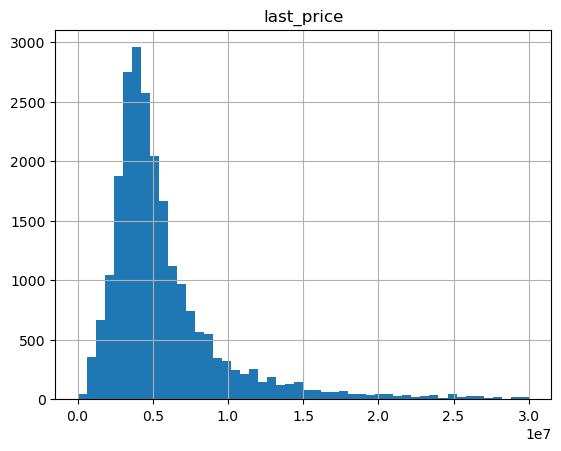

In [30]:
data.hist('last_price', bins = 50)

<Axes: >

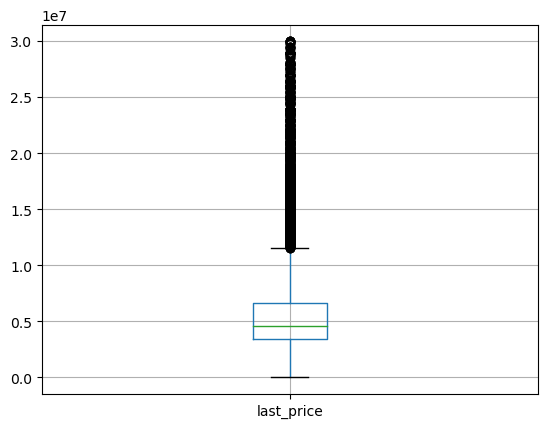

In [31]:
data.boxplot(column = 'last_price')

##### total_area

Построим гистограмму и boxplot по столбцу total_area.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

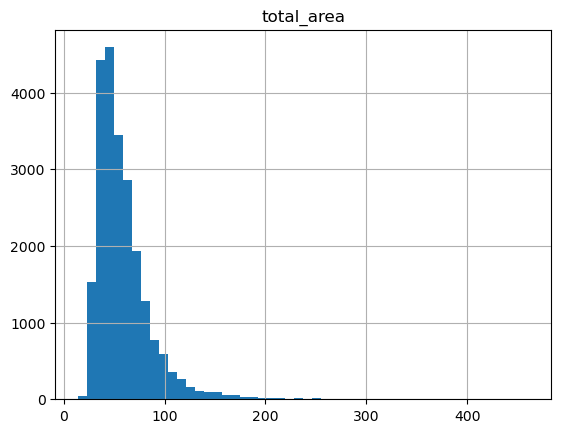

In [32]:
data.hist('total_area', bins = 50)

<Axes: >

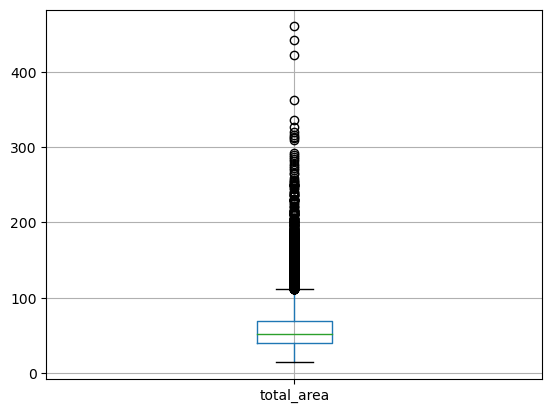

In [33]:
data.boxplot(column = 'total_area')

Удалим выбивающиеся строки с общей площадью квартир более 150 кв м.

In [34]:
data = data.loc[data['total_area'] < 150]

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

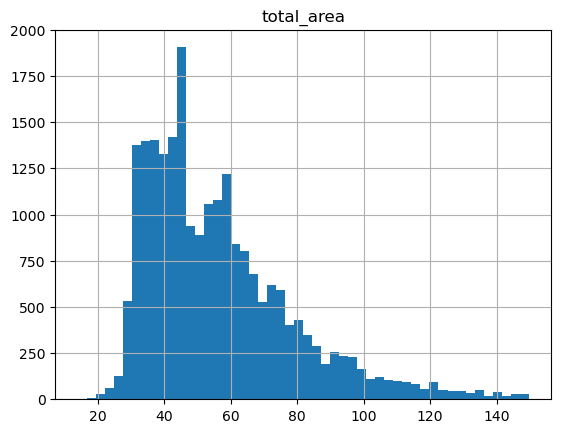

In [35]:
data.hist('total_area', bins = 50)

<Axes: >

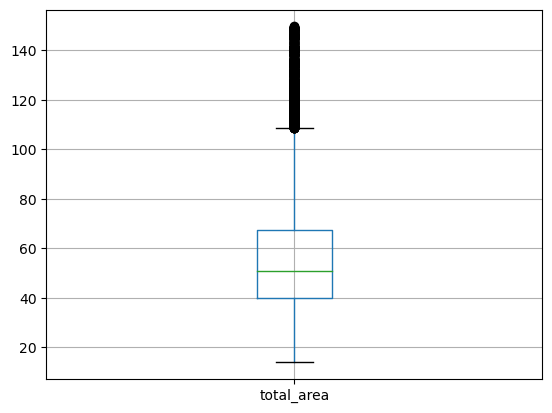

In [36]:
data.boxplot(column = 'total_area')

##### living_area

Построим гистограмму и boxplot по столбцу living_area.

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

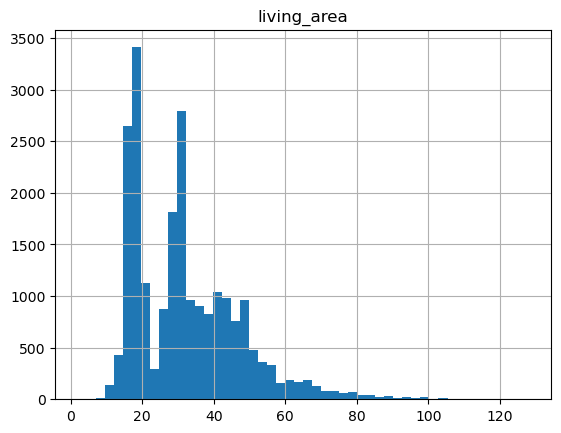

In [37]:
data.hist('living_area', bins = 50)

<Axes: >

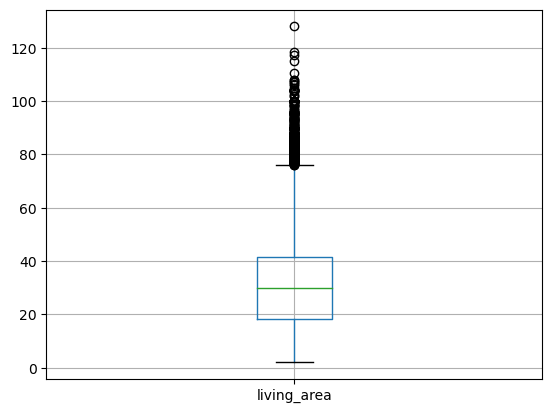

In [38]:
data.boxplot(column = 'living_area')

In [39]:
print(data['living_area'].max())
print(data.loc[data['living_area'] > 100, 'living_area'].count())

128.0
29


Удалим выбивающиеся строки с жилой площадью свыше 100 кв м.

In [40]:
data = data.loc[data['living_area'] < 100]

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

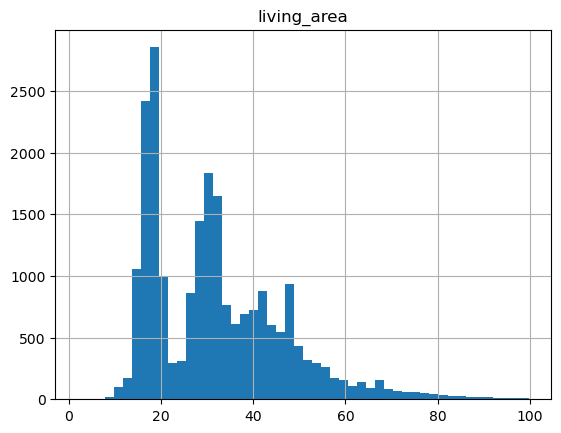

In [41]:
data.hist('living_area', bins = 50)

<Axes: >

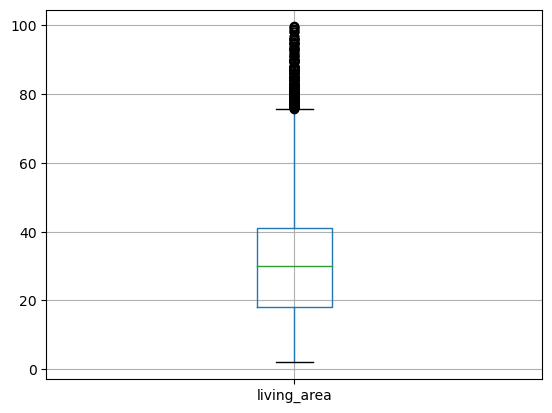

In [42]:
data.boxplot(column = 'living_area')

##### kitchen_area

Построим гистограмму и boxplot по столбцу kitchen_area.

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

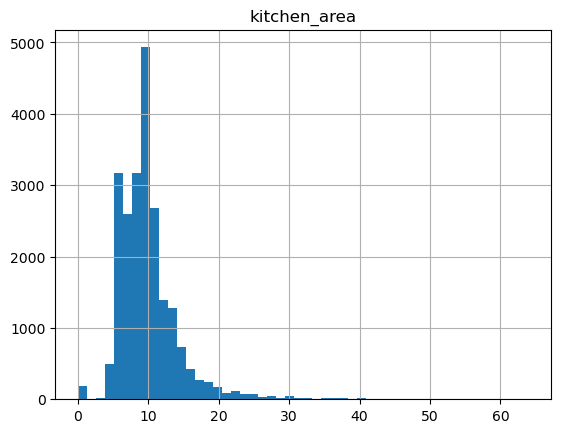

In [43]:
data.hist('kitchen_area', bins = 50)

<Axes: >

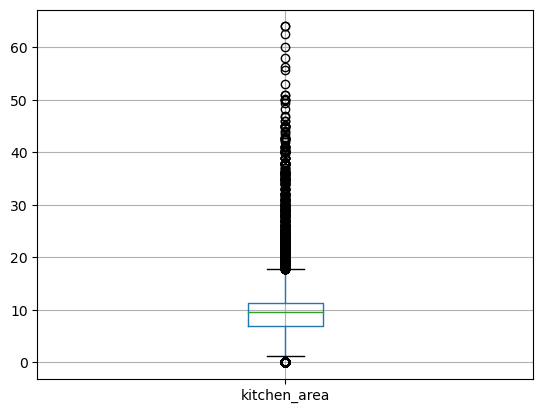

In [44]:
data.boxplot(column = 'kitchen_area')

Удалим выбивающиеся строки с площадью кухни менее 2 кв м и более 35 кв м.

In [45]:
data = data.loc[(data['kitchen_area'] < 35) & (data['kitchen_area'] > 2)]

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

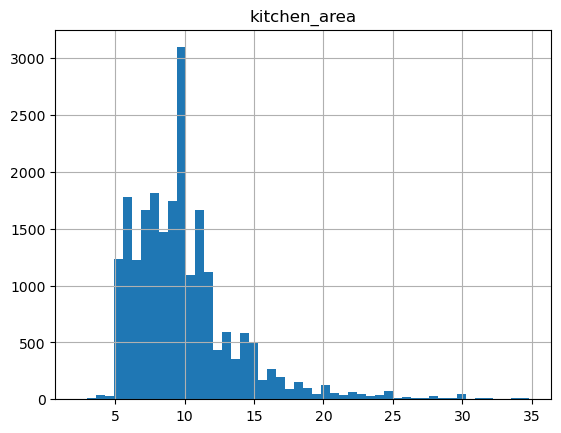

In [46]:
data.hist('kitchen_area', bins = 50)

<Axes: >

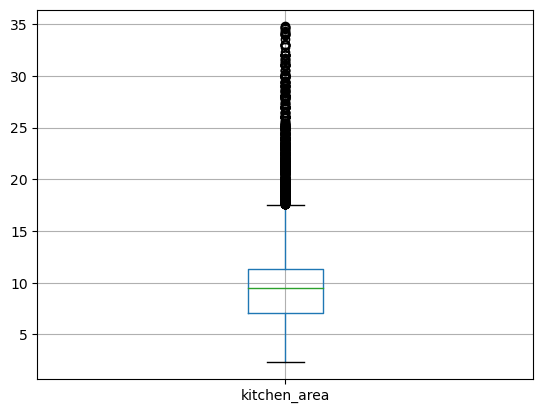

In [47]:
data.boxplot(column = 'kitchen_area')

##### floors_total

Построим гистограмму и boxplot по столбцу floors_total.

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

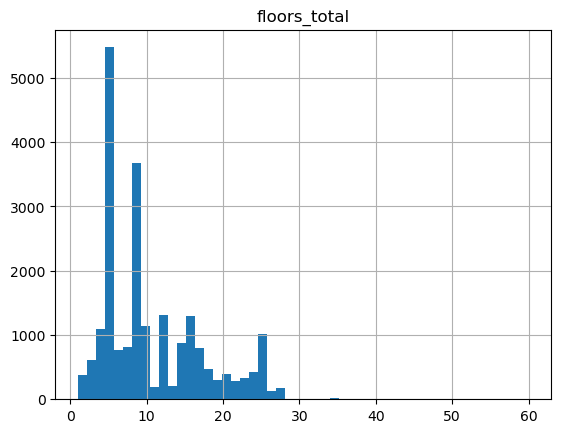

In [48]:
data.hist('floors_total', bins = 50)

<Axes: >

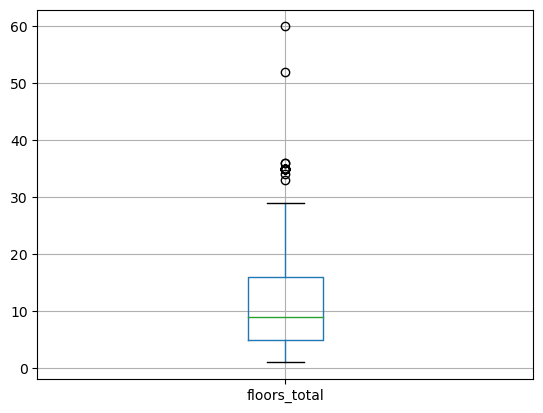

In [49]:
data.boxplot(column = 'floors_total')

Удалим выбивающиеся строки с количеством этажей свыше 30.

In [50]:
data = data.loc[data['floors_total'] < 30]

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

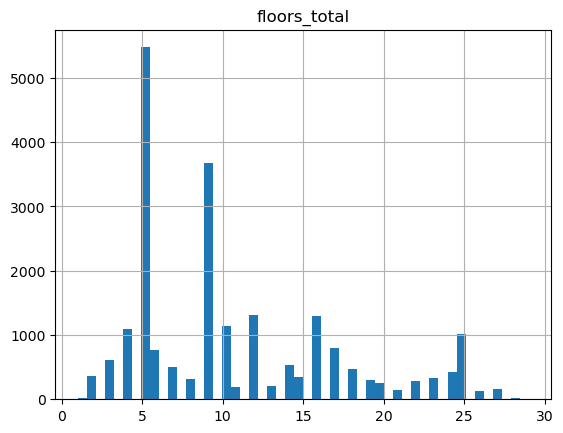

In [51]:
data.hist('floors_total', bins = 50)

<Axes: >

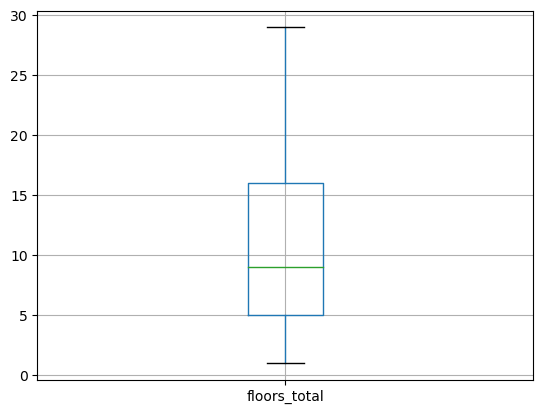

In [52]:
data.boxplot(column = 'floors_total')

### Новые столбцы  <a id="new_columns"></a> 

#### Цена одного квадратного метра

Добавим столбец с ценой квадратного метра, разделив столбец цены квартиры на ее метраж.

In [53]:
data['price_psm'] = data['last_price'] / data['total_area']

Построим гистограмму и boxplot по этому столбцу.

array([[<Axes: title={'center': 'price_psm'}>]], dtype=object)

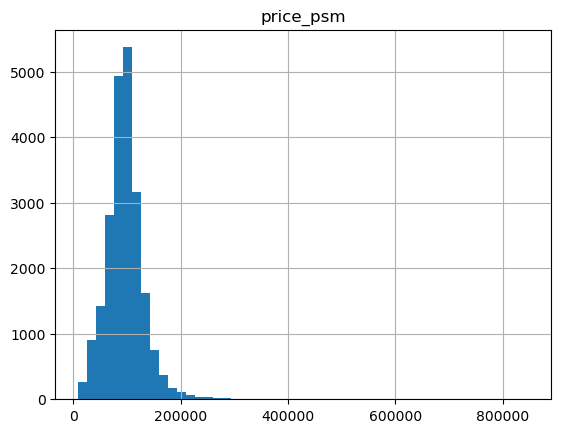

In [54]:
data.hist('price_psm', bins = 50)

<Axes: >

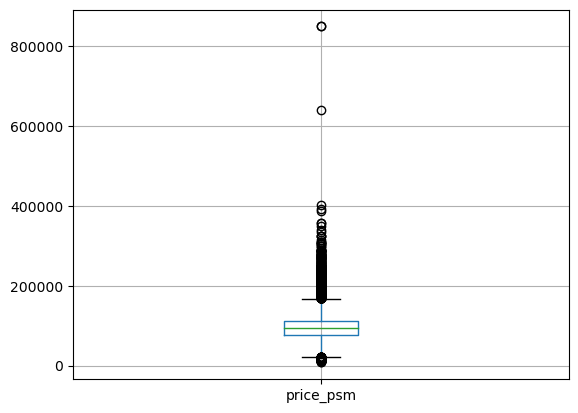

In [55]:
data.boxplot(column = 'price_psm')

Удалим все строки, где цена за квадратный метр больше 300000.

In [56]:
data = data.loc[(data['price_psm'] < 300000)]
data = data.reset_index(drop=True)

Построим еще раз гистограмму и boxplot, чтобы убедиться в их корректности.

array([[<Axes: title={'center': 'price_psm'}>]], dtype=object)

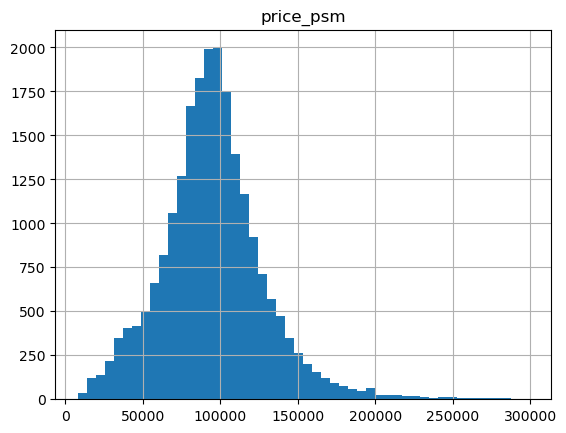

In [57]:
data.hist('price_psm', bins = 50)

<Axes: >

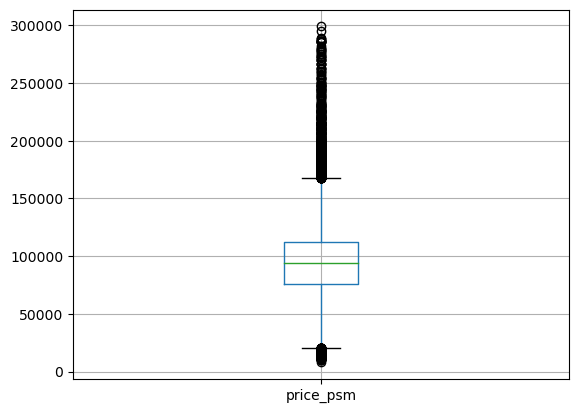

In [58]:
data.boxplot(column = 'price_psm')

#### День публикации объявления 

Создадим столбец с днем публикации объявления.

In [59]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

Создадим столбец с месяцем публикации объявления.

In [60]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

Создадим столбец с годом публикации объявления.

In [61]:
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

Создадим столбец с категоризацией по типу этажа квартиры: если этаж равен 1, значение будет "первый"; если этаж равен значению количества этажей в здании, значение будет "последний"; в любом другом случае значение будет "другой".

In [62]:
def floor_typing(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    

data['floor_type'] = data.apply(floor_typing, axis = 1)
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


#### Расстояние в км до центра города

Создадим столбец с расстояниями в километрах до центра города.

In [63]:
data['distance_to_center_km'] = data['cityCenters_nearest'] / 1000
data['distance_to_center_km'] = round(data['distance_to_center_km'], 0)

### Итог <a id="preprocessing_result"></a> 

Построим гистограмму для всех числовых столбцов таблицы на одном графике.

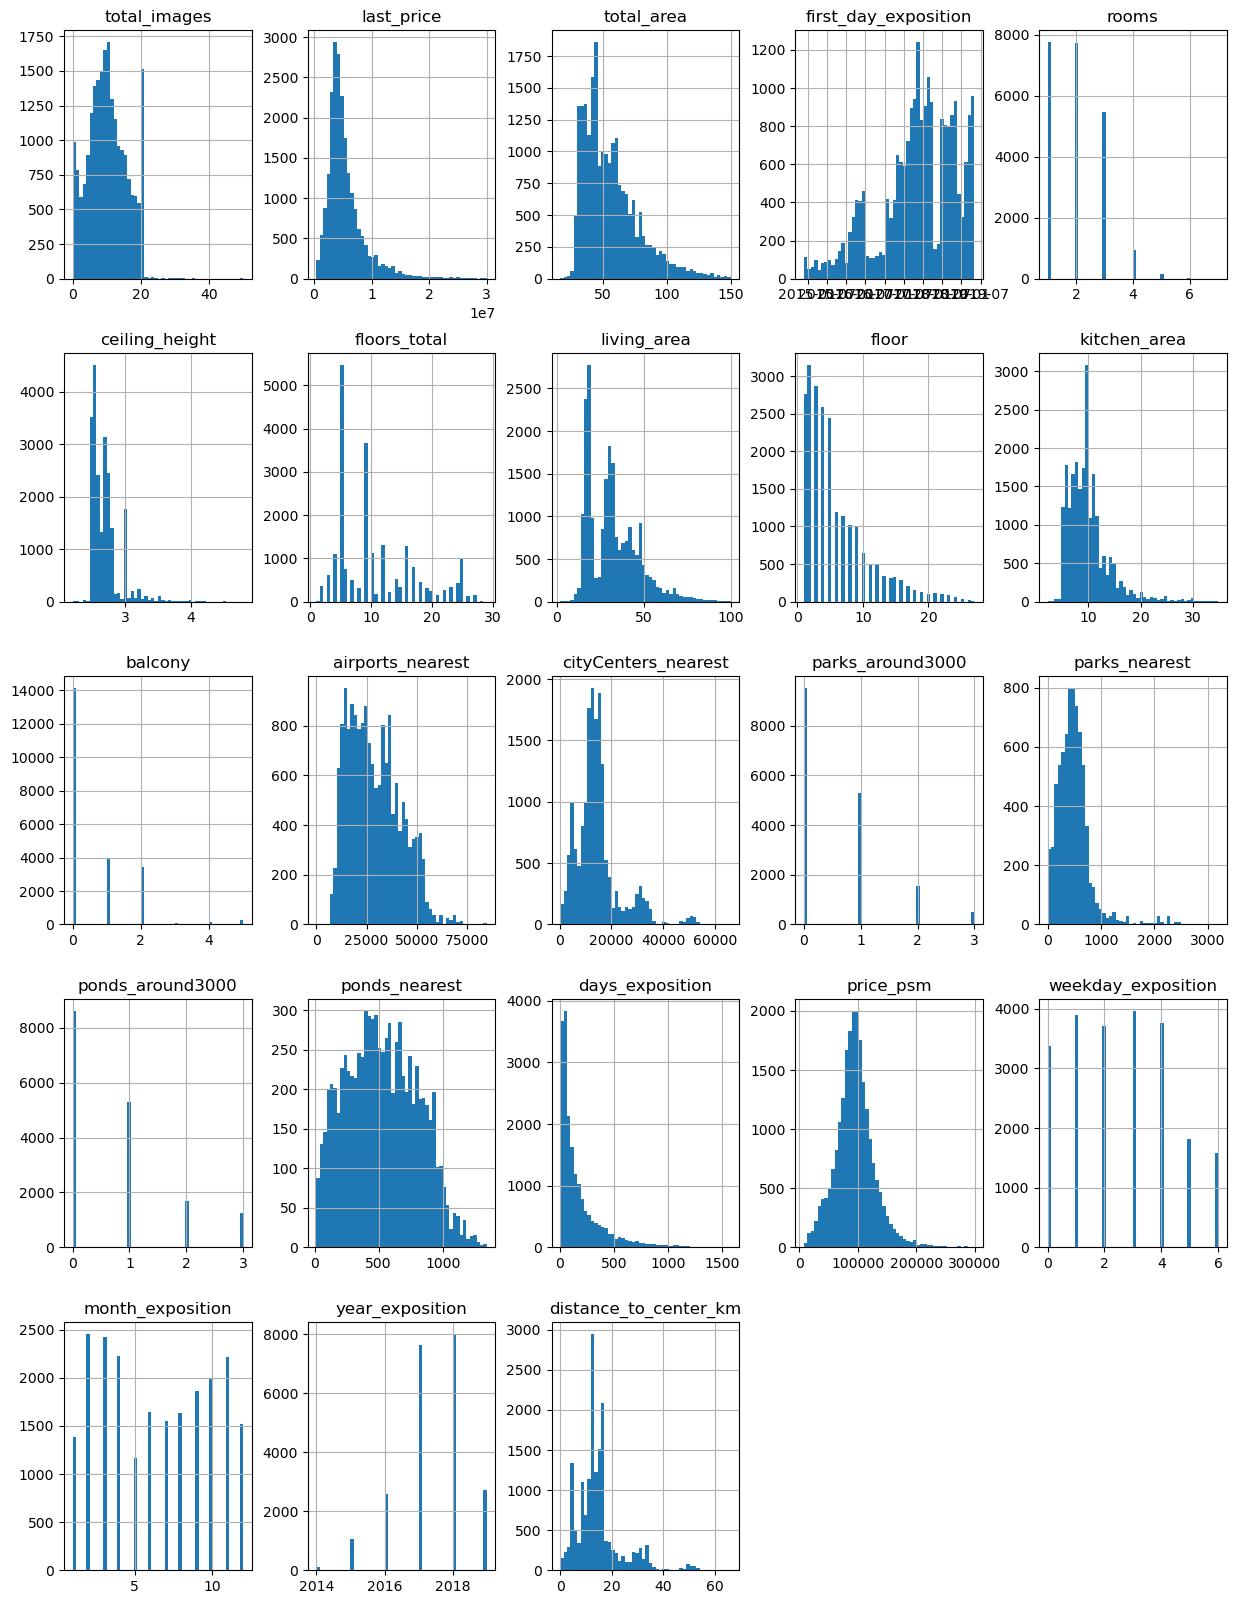

In [64]:
data = data.reset_index(drop=True)
data.hist(figsize=(15, 20), bins = 50);

Выведем общую информацию о датафрейме.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22084 entries, 0 to 22083
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           22084 non-null  int64         
 1   last_price             22084 non-null  float64       
 2   total_area             22084 non-null  float64       
 3   first_day_exposition   22084 non-null  datetime64[ns]
 4   rooms                  22084 non-null  int64         
 5   ceiling_height         22084 non-null  float64       
 6   floors_total           22084 non-null  int32         
 7   living_area            22084 non-null  float64       
 8   floor                  22084 non-null  int64         
 9   is_apartment           22084 non-null  bool          
 10  studio                 22084 non-null  bool          
 11  open_plan              22084 non-null  bool          
 12  kitchen_area           22084 non-null  float64       
 13  b

In [66]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_psm,weekday_exposition,month_exposition,year_exposition,distance_to_center_km
count,22084.000000,2.208400e+04,22084.000000,22084.000000,22084.000000,22084.000000,22084.000000,22084.000000,22084.000000,22084.000000,...,16853.000000,7338.000000,16853.000000,8238.000000,19189.000000,22084.000000,22084.000000,22084.000000,22084.000000,16852.000000
mean,9.857182,5.472969e+06,56.258016,2.006611,2.693691,10.668493,32.076996,5.847899,9.941228,0.596722,...,0.587492,494.961706,0.737495,526.794489,178.652509,95396.616420,2.570594,6.402871,2017.379822,14.522015
std,5.628837,3.418376e+06,21.711160,0.920885,0.211845,6.519447,14.752244,4.833177,3.918881,0.958742,...,0.779980,341.884505,0.915641,276.605261,216.819419,33802.775000,1.791199,3.491268,1.030312,8.583965
min,0.000000,4.300000e+05,17.000000,1.000000,2.200000,1.000000,2.000000,1.000000,2.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.403750e+06,40.000000,1.000000,2.550000,5.000000,18.200000,2.000000,7.100000,0.000000,...,0.000000,290.000000,0.000000,307.000000,45.000000,75757.575758,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.594500e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.500000,0.000000,...,0.000000,458.000000,0.000000,512.000000,95.000000,94117.647059,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.750000,16.000000,41.362500,8.000000,11.292920,1.000000,...,1.000000,616.000000,1.000000,736.000000,228.000000,112426.669484,4.000000,10.000000,2018.000000,16.000000
max,50.000000,2.999900e+07,149.600000,7.000000,4.800000,29.000000,99.700000,27.000000,34.780000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,299000.000000,6.000000,12.000000,2019.000000,66.000000


### Выводы <a id="preprocessing_conclusion"></a> 

В ходе предобработки данных были выполнены следующие действия:
- Заполнены пропуски в колонке balcony.
- Заполнены пропуски в колонке is_apartment.
- Изменены типы данных в колонках first_day_exposition и floors_total.
- Исправлены неявные дубликаты в колонке locality_name.
- Удалены строки с отсутствующими данными в колонке floors_total.
- Заполнены пропуски в ceiling_height по медианным значениям floors_total.
- Заполнены пропуски в столбце kitchen_area:
    - при условии, что комнат 0, заполнено 0;
    - остальные заменены средним по количеству комнат.
- Пропущенные значения в living_area заменены на среднее по количеству комнат.
- Удалены строки, где сумма жилой площади и площади кухни больше, чем общая площадь квартиры.
- Данные избавлены от выбивающихся значений в столбцах ceiling_height, last_price, total_area, living_area, kitchen_area, floors_total.
- Добавлены новые столбцы: цена одного квадратного метра, день публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние в км до центра города.

## Исследовательский анализ данных  <a id="data_analysis"></a> 

### Общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат  <a id="hists_1"></a> 

#### Общая площадь

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

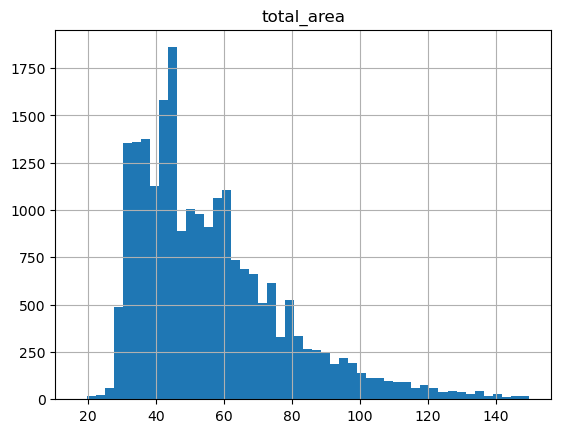

In [67]:
data.hist('total_area', bins = 50)

#### Жилая площадь

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

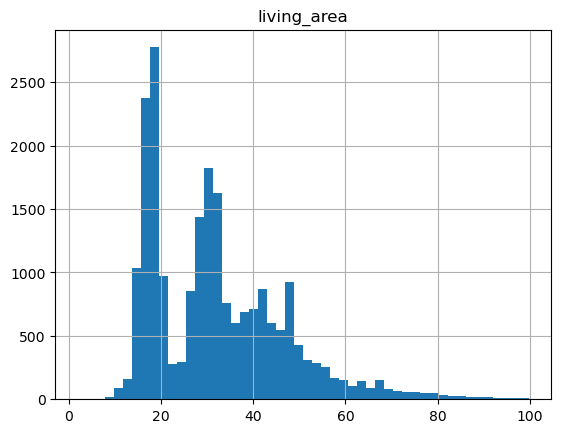

In [68]:
data.hist('living_area', bins = 50)

#### Площадь кухни

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

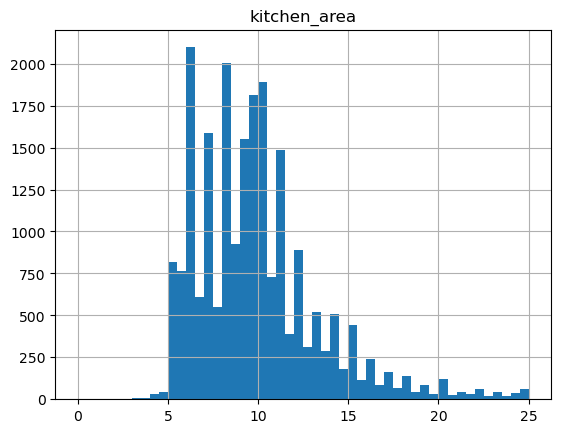

In [69]:
data.hist('kitchen_area', bins = 50, range = (0, 25))

#### Цена объекта

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

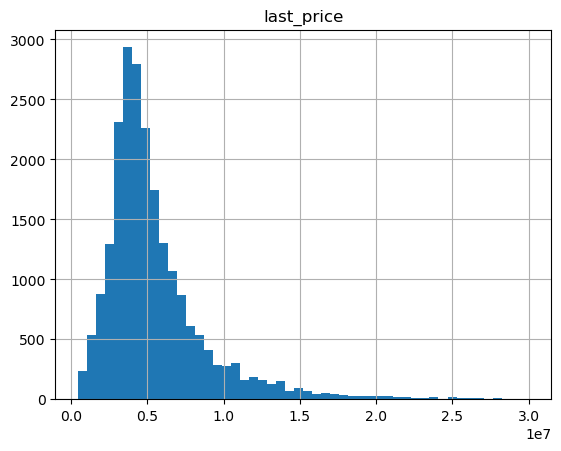

In [70]:
data.hist('last_price', bins = 50)

#### Количество комнат

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

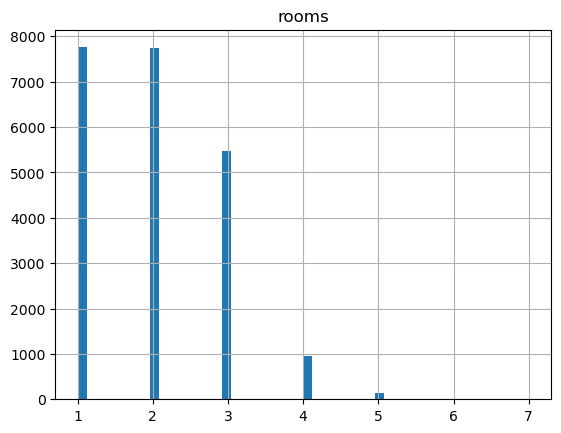

In [71]:
data.hist('rooms', bins = 50)

Построим график зависимости цены за квадратный метр от количества комнат.

rooms
1     99933.194329
2     93614.303071
3     91815.105299
4     94540.487010
5     87771.157742
6     93675.233357
7    135436.611270
Name: price_psm, dtype: float64


<Axes: xlabel='rooms'>

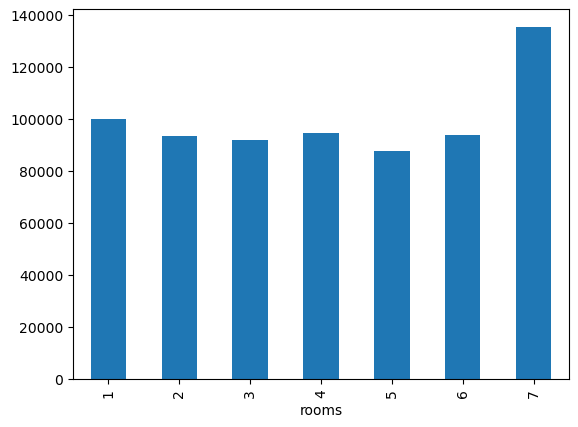

In [72]:
rooms_price = data.groupby(by = 'rooms')['price_psm'].mean()
print(rooms_price)
rooms_price.plot(x = 'rooms', y = 'price_psm', kind = 'bar')

#### Сводные данные по площадям, цене и количеству комнат и поиск взаимосвязей 

In [73]:
data['id'] = list(range(22084))

       kitchen_area  last_price  living_area      price_psm  rooms  total_area
id                                                                            
0         25.000000  13000000.0    51.000000  120370.370370      3      108.00
1         11.000000   3350000.0    18.600000   82920.792079      1       40.40
2          8.300000   5196000.0    34.300000   92785.714286      2       56.00
3          9.100000   2890000.0    14.400000   95065.789474      1       30.40
4         14.400000   3700000.0    10.600000   99195.710456      1       37.30
...             ...         ...          ...            ...    ...         ...
22079     13.830000   9700000.0    73.300000   72490.845228      3      133.81
22080      8.500000   3100000.0    38.000000   52542.372881      3       59.00
22081      9.970915   2500000.0    29.700000   44091.710758      2       56.70
22082     23.300000  11475000.0    31.731865  149511.400651      2       76.75
22083      9.000000   1350000.0    12.300000   41795

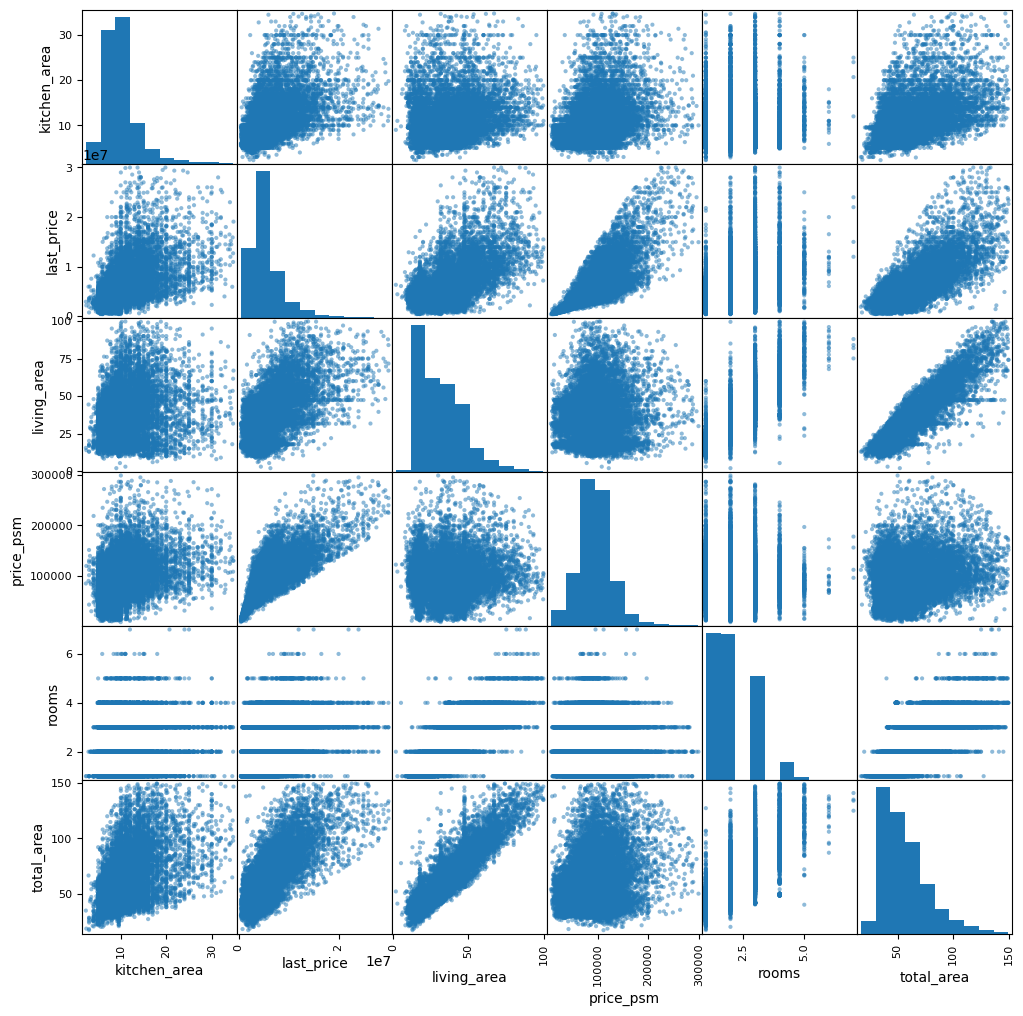

In [74]:
squares = data.pivot_table(index = 'id', values = ['last_price', 'rooms', 'price_psm', 'total_area', 'living_area', 'kitchen_area'])
print(squares)
print(squares.corr())
pd.plotting.scatter_matrix(squares, figsize=(12, 12));

#### Промежуточные выводы
- **Общая площадь**:
    - Пик количества квартир приходится на площадь 45 кв м.
- **Жилая площадь**:
     - Имеет четкую прямо пропорциональную связь с общей площадью и количеством комнат. Это коррелирует с предыдущим выводом.
     - Имеет два пика количества квартир, ~18 и ~30 кв м.
- **Площадь кухни**:
    - Чаще всего площадь кухни составляет примерно от 5 до 15 кв м, больше всего - 10 кв м..
    - Не зависит от других параметров, не увеличивается при увеличении жилой и общей площади.
- **Цена**:
    - Больше всего квартир продается по цене ~4 млн рублей;
    - Средняя цена квартиры в Санкт-Петербурге и Ленинградской области ~5,5 млн рублей;
    - Цена за квадратный метр в квартирах до 6 комнат различается незначительно, большой скачок наблюдается в квартирах с семью комнатами - более чем на 30 тыс рублей;
    - Цена за квадратный метр чаще всего примерно 100 тыс. рублей и практически не имеет связи с параметрами площади.
- **Количество комнат**:
    - 1-комнатных и 2-комнатных квартир выставлено на продажу больше всего (более 7 тыс объявлений для каждой группы).

### Высота потолков, этаж квартиры, тип этажа квартиры, количество этажей в доме <a id="hists_2"></a> 

#### Высота потолков

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

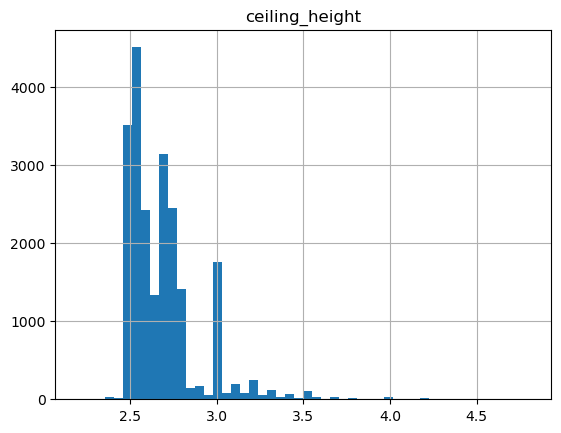

In [75]:
data.hist('ceiling_height', bins = 50)

#### Этаж квартиры

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

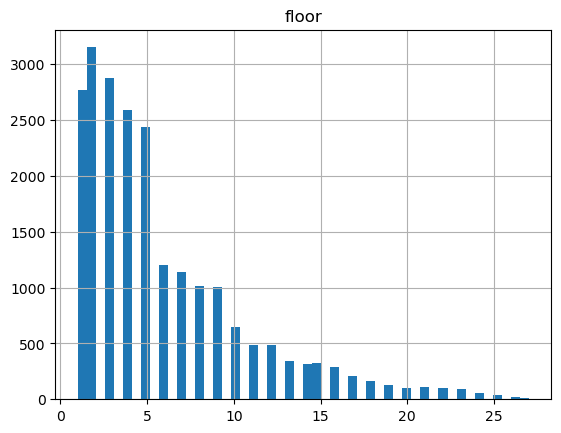

In [76]:
data.hist('floor', bins = 50)

Построим график зависимости цены за метр от этажа квартиры.

floor
1      80150.303228
2      90796.431287
3      93827.220413
4      93644.263067
5      90468.957188
6     103099.945940
7     102976.412417
8     101324.194924
9     101348.606536
10    106440.931577
11    107369.980489
12    107391.259396
13    108290.602526
14    106686.117953
15    108369.592853
16    108667.087500
17    106365.584525
18    104209.581847
19    109212.168815
20    110031.915290
21    114630.330626
22    111329.034037
23    111148.009145
24    107862.786009
25    105773.531544
26     92383.724353
27     89234.596237
Name: price_psm, dtype: float64


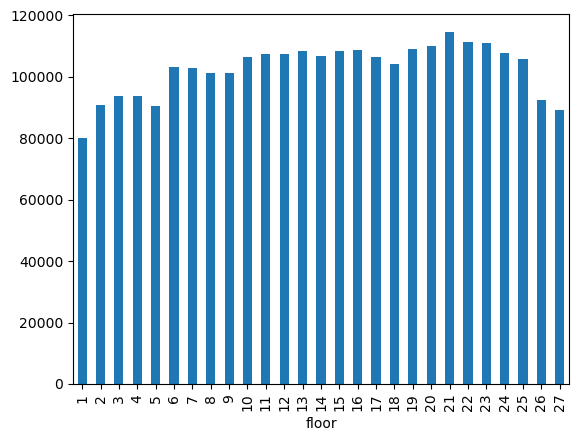

In [77]:
floor_price = data.groupby(by = 'floor')['price_psm'].mean()
print(floor_price)
floor_price.plot(x = 'floor', y = 'price_psm', kind = 'bar');

##### Тип этажа квартиры 

floor_type
другой       99599.586736
первый       80150.303228
последний    86928.297268
Name: price_psm, dtype: float64


<Axes: xlabel='floor_type'>

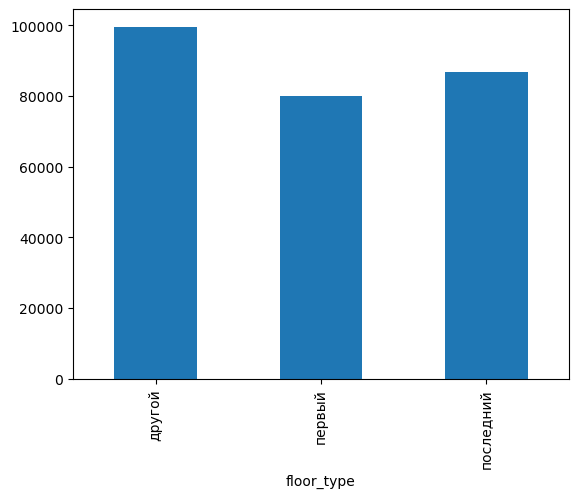

In [78]:
floor_type_price = data.groupby(by = 'floor_type')['price_psm'].mean()
print(floor_type_price)
floor_type_price.plot(x = 'floor_type', y = 'price_psm', kind = 'bar')

#### Общее количество этажей в доме

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

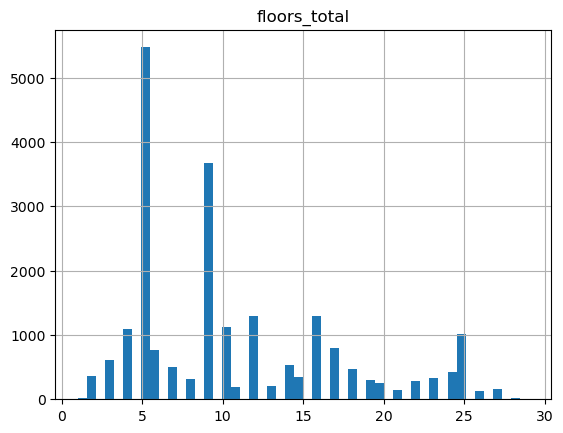

In [79]:
data.hist('floors_total', bins = 50)

Построим график зависимости цены за метр квартиры от количества этажей в доме.

floors_total
1      47973.014593
2      51307.633387
3      77671.122351
4      92896.708650
5      79993.068226
6     109202.564989
7     116088.472774
8     120764.816614
9      91005.674972
10    102344.647555
11    120165.941633
12    101569.202801
13    119488.527513
14    105254.921879
15    103236.068368
16    108115.289469
17    107186.886918
18    102439.697513
19    109428.256175
20    112589.819154
21    107557.796622
22    110319.375470
23    104625.008085
24    110066.651546
25    109805.409033
26    102928.076444
27     96069.564864
28    103378.297319
29     94907.407407
Name: price_psm, dtype: float64


<Axes: xlabel='floors_total'>

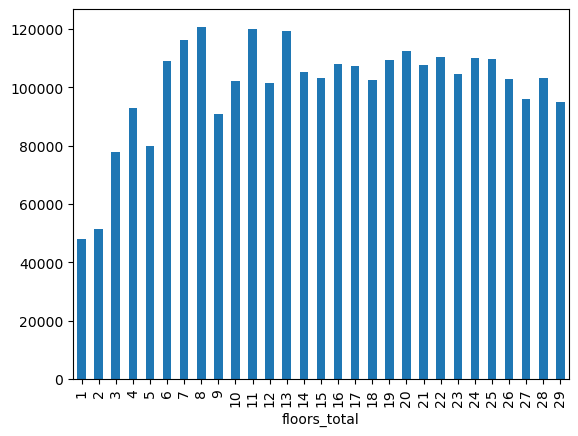

In [80]:
floors_total_price = data.groupby(by = 'floors_total')['price_psm'].mean()
print(floors_total_price)
floors_total_price.plot(x = 'floors_total', y = 'price_psm', kind = 'bar')

#### Сводные данные по высоте потолков, этажам, цене и поиск взаимосвязей

       ceiling_height  floor  floors_total  last_price      price_psm
id                                                                   
0                2.70      8            16  13000000.0  120370.370370
1                2.75      1            11   3350000.0   82920.792079
2                2.55      4             5   5196000.0   92785.714286
3                2.65      5            12   2890000.0   95065.789474
4                2.66      6            26   3700000.0   99195.710456
...               ...    ...           ...         ...            ...
22079            3.70      3             5   9700000.0   72490.845228
22080            2.55      4             5   3100000.0   52542.372881
22081            2.80      1             3   2500000.0   44091.710758
22082            3.00     12            17  11475000.0  149511.400651
22083            2.50      1             5   1350000.0   41795.665635

[22084 rows x 5 columns]
                ceiling_height     floor  floors_total  last_pri

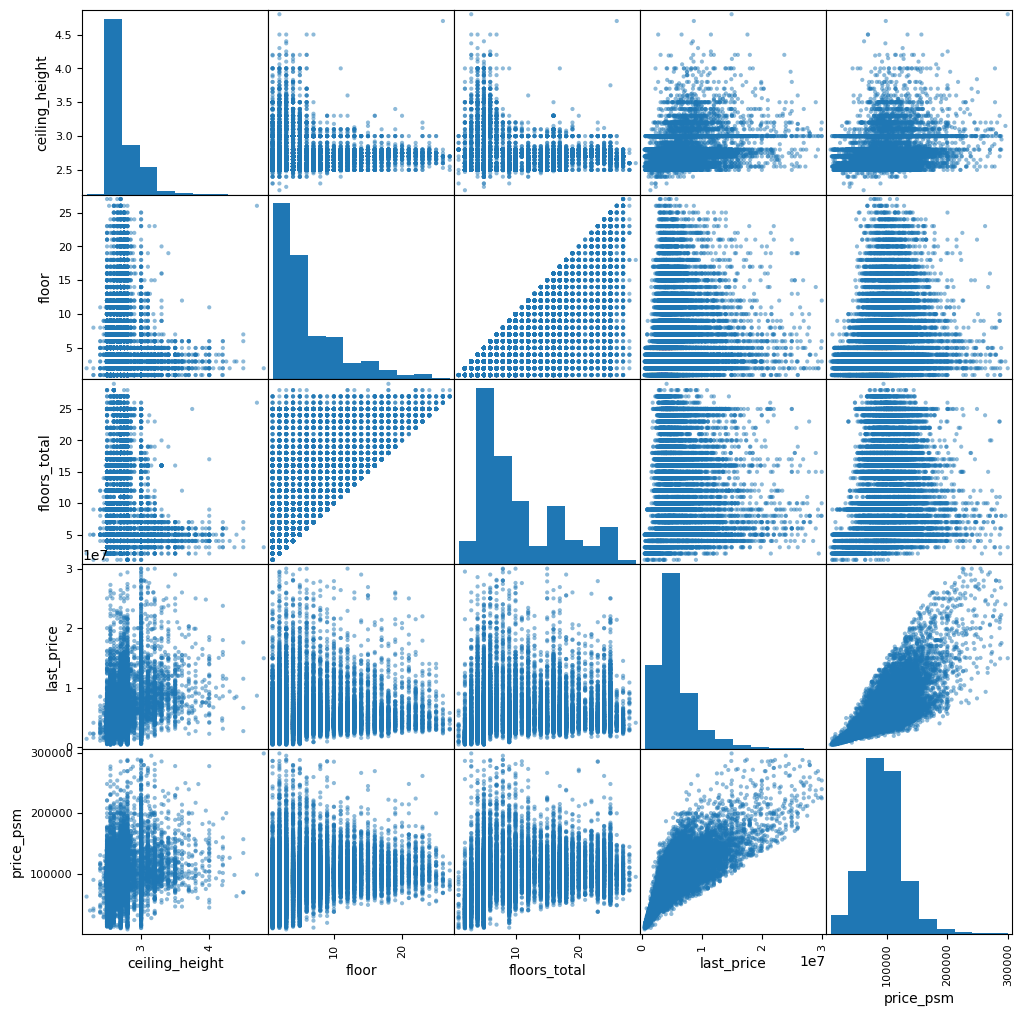

In [81]:
buildings = data.pivot_table(index = 'id', values = ['last_price', 'price_psm', 'ceiling_height', 'floor', 'floors_total'])
print(buildings)
print(buildings.corr())
pd.plotting.scatter_matrix(buildings, figsize=(12, 12));

##### Промежуточные выводы
- **Высота потолков**: 
    - В среднем составляет 2.7 метра, во всех категориях квартир высота потолков примерно одинакова.
    - В группе квартир до 10 этажей встречаются более высокие потолки.
    - Квартиры с низкими потолками можно найти в любой ценовой категории, цены за квадратный метр квартир с высокими потолками начинаются в среднем от 100 тыс рублей.
- **Этаж**:
    - Среди квартир, находящихся на этажах с первого по десятый, чаще встречается более высокая цена. Это может быть связано с тем, что в центре и приближенных к нему районах Петербурга меньше высоких зданий.
    - Есть зависимость между количеством этажей в здании и ценой за квадратный метр: ниже всего в 1 и 2 этажных зданиях, выбиваются значения с 6, 7, 8, 11 и 13 этажами, у квартир в зданиях выше 9 этажей - стабильное плато цен за квадратный метр, вероятно, потому что это типовый застройки.
- **Тип этажа**:
    - У квартир, расположенных на первом этаже, наблюдается самая низкая цена за квадратный метр - ~80 тыс рублей, чуть выше цена за квадратный метр у квартир на последнем этаже - ~87 тыс рублей. Самые высокие цены за квадратный метр у квартир на средних этажах - в среднем ~100 тыс рублей.
- **Количество этажей**:
    - Часто встречаются высокие цены на квартиры в зданиях до 10 этажей.
    - В домах этажностью 1 до 21 этажей наблюдается плавный рост в цене за квадратный метр квартиры.

### Расстояния до центра города в метрах, ближайшего аэропорта и ближайшего парка <a id="hists_3"></a> 

#### Расстояние до центра города в метрах

array([[<Axes: title={'center': 'cityCenters_nearest'}>]], dtype=object)

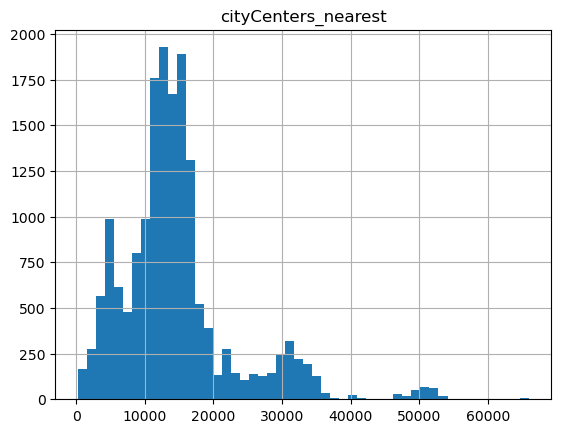

In [82]:
data.hist('cityCenters_nearest', bins = 50)

Создадим датафрейм citycenters_without_nan, где будут данные без пропусков в столбце cityCenters_nearest.

In [83]:
citycenters_without_nan = data.dropna(subset = ['cityCenters_nearest'])
citycenters_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16852 entries, 0 to 22082
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           16852 non-null  int64         
 1   last_price             16852 non-null  float64       
 2   total_area             16852 non-null  float64       
 3   first_day_exposition   16852 non-null  datetime64[ns]
 4   rooms                  16852 non-null  int64         
 5   ceiling_height         16852 non-null  float64       
 6   floors_total           16852 non-null  int32         
 7   living_area            16852 non-null  float64       
 8   floor                  16852 non-null  int64         
 9   is_apartment           16852 non-null  bool          
 10  studio                 16852 non-null  bool          
 11  open_plan              16852 non-null  bool          
 12  kitchen_area           16852 non-null  float64       
 13  b

Построим график зависимости названия населенного пункта и близости к центру.

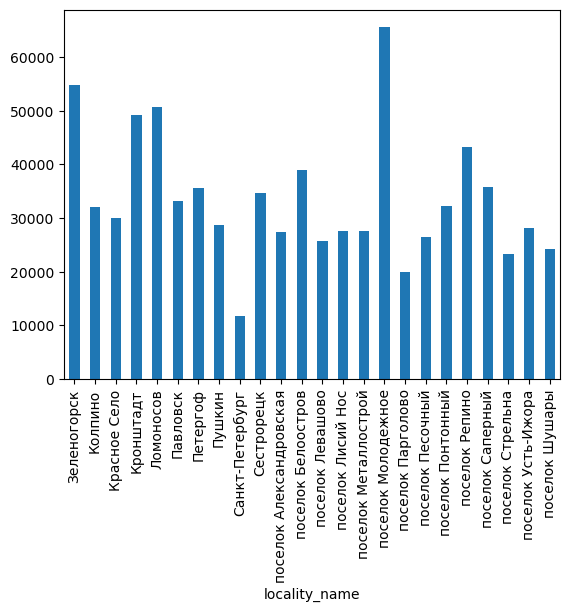

In [84]:
citycenters_without_nan = citycenters_without_nan.groupby(by = 'locality_name')['cityCenters_nearest'].mean()
citycenters_without_nan.plot(x = 'locality_name', y = 'cityCenters_nearest', kind = 'bar');

#### Расстояние до ближайшего аэропорта в метрах

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

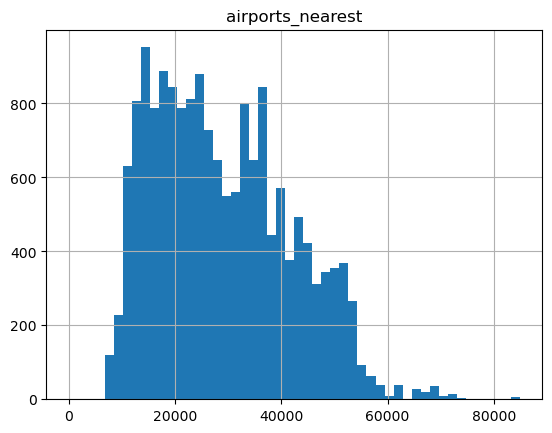

In [85]:
data.hist('airports_nearest', bins = 50)

Создадим датафрейм airports_without_nan, где будут данные без пропусков в столбце airports_nearest.

In [86]:
airports_without_nan = data.dropna(subset = ['airports_nearest'])
airports_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16832 entries, 0 to 22082
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           16832 non-null  int64         
 1   last_price             16832 non-null  float64       
 2   total_area             16832 non-null  float64       
 3   first_day_exposition   16832 non-null  datetime64[ns]
 4   rooms                  16832 non-null  int64         
 5   ceiling_height         16832 non-null  float64       
 6   floors_total           16832 non-null  int32         
 7   living_area            16832 non-null  float64       
 8   floor                  16832 non-null  int64         
 9   is_apartment           16832 non-null  bool          
 10  studio                 16832 non-null  bool          
 11  open_plan              16832 non-null  bool          
 12  kitchen_area           16832 non-null  float64       
 13  b

Построим график зависимости названия населенного пункта и близости к аэропорту.

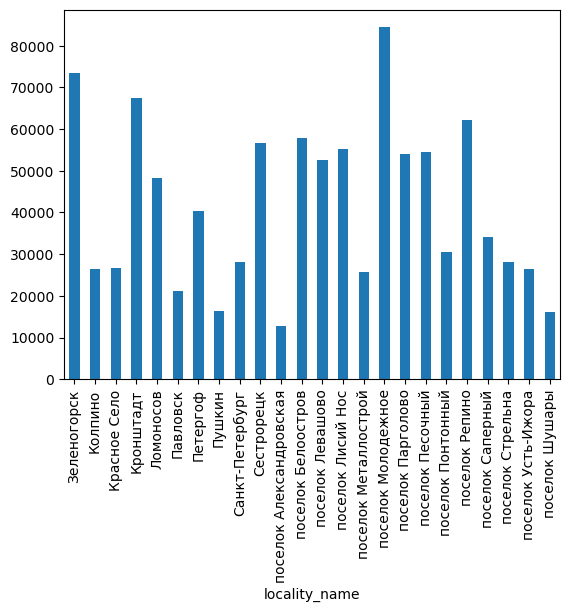

In [87]:
airports_without_nan = airports_without_nan.groupby(by = 'locality_name')['airports_nearest'].mean()
airports_without_nan.plot(x = 'locality_name', y = 'airports_nearest', kind = 'bar');

#### Расстояние до ближайшего парка в метрах

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

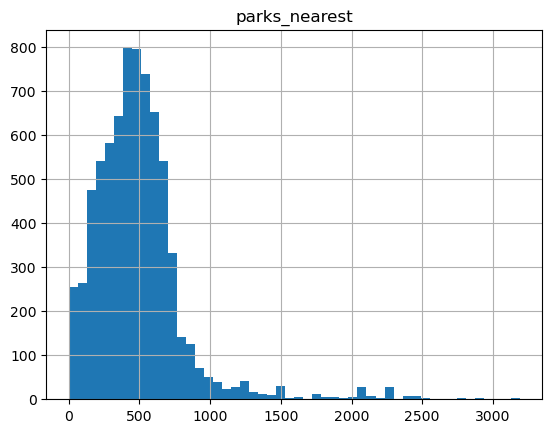

In [88]:
data.hist('parks_nearest', bins = 50)

Создадим датафрейм parks_without_nan, где будут данные без пропусков в столбце parks_nearest.

In [89]:
parks_without_nan = data.dropna(subset = ['parks_nearest'])
parks_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7338 entries, 0 to 22082
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           7338 non-null   int64         
 1   last_price             7338 non-null   float64       
 2   total_area             7338 non-null   float64       
 3   first_day_exposition   7338 non-null   datetime64[ns]
 4   rooms                  7338 non-null   int64         
 5   ceiling_height         7338 non-null   float64       
 6   floors_total           7338 non-null   int32         
 7   living_area            7338 non-null   float64       
 8   floor                  7338 non-null   int64         
 9   is_apartment           7338 non-null   bool          
 10  studio                 7338 non-null   bool          
 11  open_plan              7338 non-null   bool          
 12  kitchen_area           7338 non-null   float64       
 13  ba

Построим график зависимости названия населенного пункта и близости к парку.

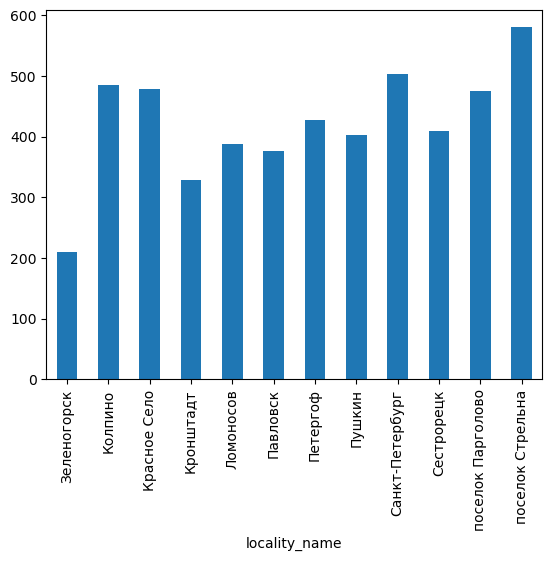

In [90]:
parks_without_nan = parks_without_nan.groupby(by = 'locality_name')['parks_nearest'].mean()
parks_without_nan.plot(x = 'locality_name', y = 'parks_nearest', kind = 'bar');

##### Промежуточные выводы:
- В данных о расстояниях много пропусков, вероятнее всего потому что данные рассчитываются системой. Объект (центр города, парк, аэропорт) может просто отсутствовать вблизи квартиры, а значит и указывать в этой колонке нечего.
- Центр:
    - Больше всего квартир расположено на расстоянии 10-15 км от центра.
    - Ближе всего к центру расположены квартиры в Санкт-Петербурге. Вероятнее всего все остальные населенные пункты, в которых есть данные по расстоянию до центра ориентируются именно на центр Санкт-Петербурга. К примеру, Шушары, Парголово, Стрельна, действительно находятся ближе к городу.
- Аэропорт:
    - Данные так же подтверждают гипотезу, поселок Александровская и поселок Шушары на картах действительно находятся ближе всего к аэропорту Пулково, а поселок Моложежное дальше всего. Значит, ориентация в данных идет по Пулково, а квартиры с отсутствующими данными просто находятся вне радиуса поиска.
- Парки:
    - Здесь населенных пунктов с данными несколько меньше, но можно сказать, что это самые "зеленые" населенные пункты ЛО. В каждом находятся крупные парки, на которые и идет ориентация.

### Год, день и месяц публикации объявления <a id="hists_4"></a> 

#### Год публикации

array([[<Axes: title={'center': 'year_exposition'}>]], dtype=object)

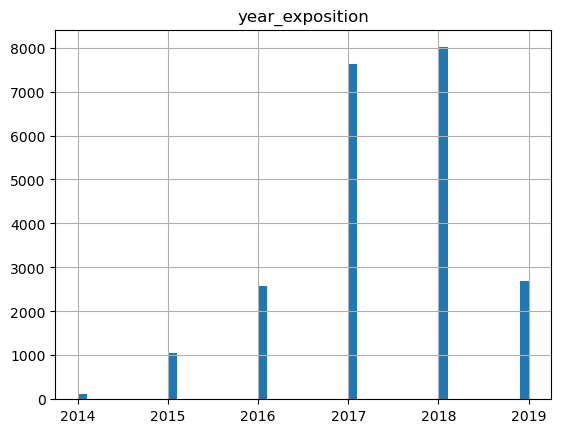

In [91]:
data.hist('year_exposition', bins = 50)

Построим график зависимости цены за квадратный метр и года публикации.

year_exposition
2014    109600.948393
2015     95838.872295
2016     93237.363668
2017     93418.576439
2018     95262.165702
2019    102669.626575
Name: price_psm, dtype: float64


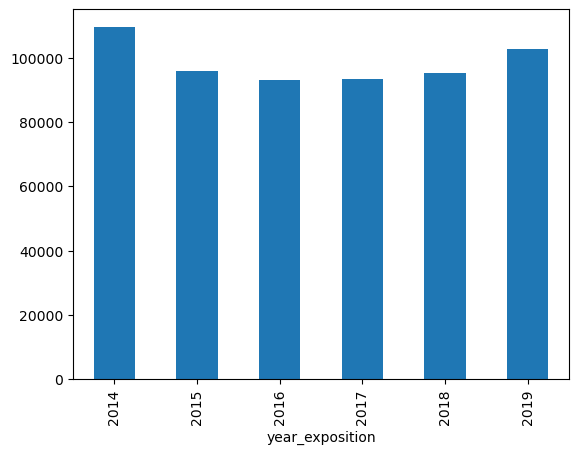

In [92]:
year_price = data.groupby(by = 'year_exposition')['price_psm'].mean()
print(year_price)
year_price.plot(x = 'year_exposition', y = 'price_psm', kind = 'bar');

#### Месяц публикации

array([[<Axes: title={'center': 'month_exposition'}>]], dtype=object)

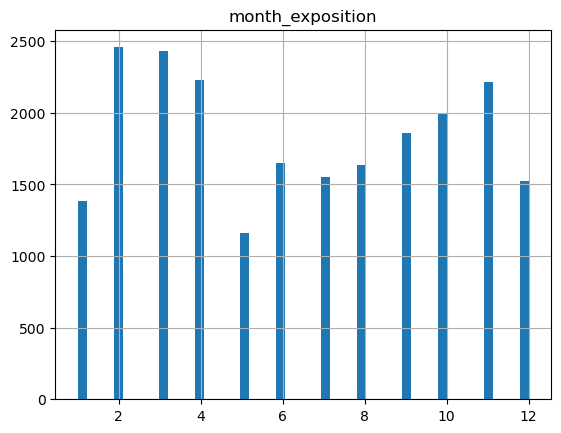

In [93]:
data.hist('month_exposition', bins = 50)

Построим график зависимости цены за квадратный метр и месяца публикации.

month_exposition
1     95875.827835
2     95077.438644
3     95686.272114
4     96751.220350
5     94619.844283
6     93205.094379
7     94668.717342
8     96294.907538
9     96839.299252
10    94979.671297
11    95595.641904
12    94268.913905
Name: price_psm, dtype: float64


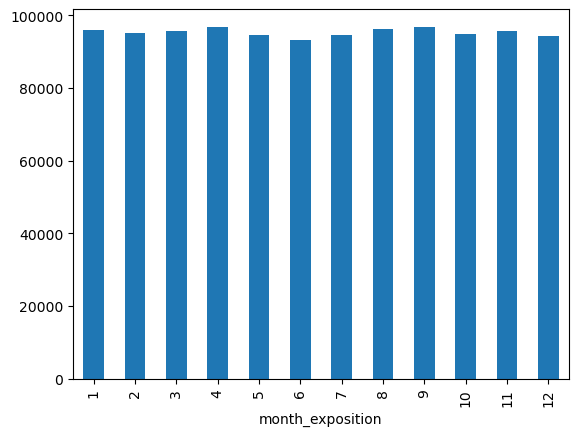

In [94]:
month_price = data.groupby(by = 'month_exposition')['price_psm'].mean()
print(month_price)
month_price.plot(x = 'month_exposition', y = 'price_psm', kind = 'bar');

#### День недели публикации

array([[<Axes: title={'center': 'weekday_exposition'}>]], dtype=object)

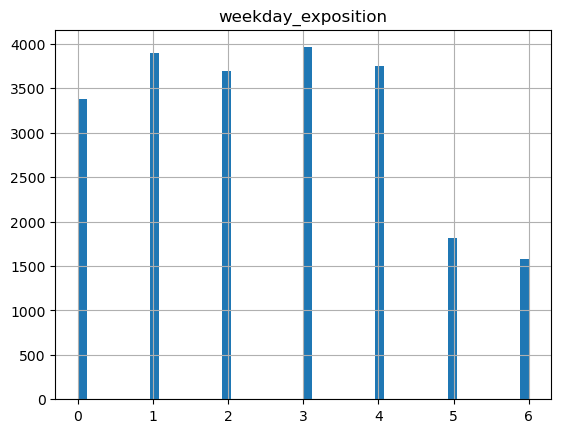

In [95]:
data.hist('weekday_exposition', bins = 50)

Построим график зависимости цены за квадратный метр и дня публикации.

weekday_exposition
0    95711.545107
1    95711.449392
2    96049.114407
3    95365.791314
4    95293.357877
5    93743.390620
6    94646.205680
Name: price_psm, dtype: float64


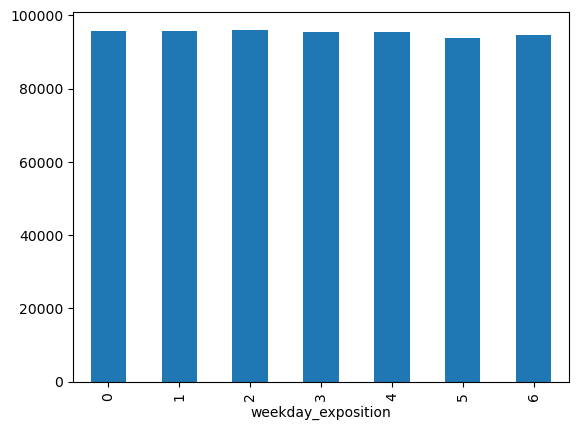

In [96]:
weekday_price = data.groupby(by = 'weekday_exposition')['price_psm'].mean()
print(weekday_price)
weekday_price.plot(x = 'weekday_exposition', y = 'price_psm', kind = 'bar');

**Выводы**:
- Год:
    - В данных больше всего объявлений о продаже квартир за 2017 и 2018 года.
    - Наибольшая цена за квадратный метр была в 2014 году, затем к 2016 наблюдается спад и плавный рост к 2019 году.
- Месяц:
    - Больше всего объявлений выложено в следующие месяцы: февраль, март, апрель, ноябрь.
    - Связь между ценой квартиры и месяцем объявления о продаже не наблюдается.
- День:
    - Связь между ценой квартиры и днем недели объявления о продаже не наблюдается.
    - Объявления чаще выкладывают в будние дни.

### Сколько дней занимает продажа квартиры <a id="hists_5"></a> 

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

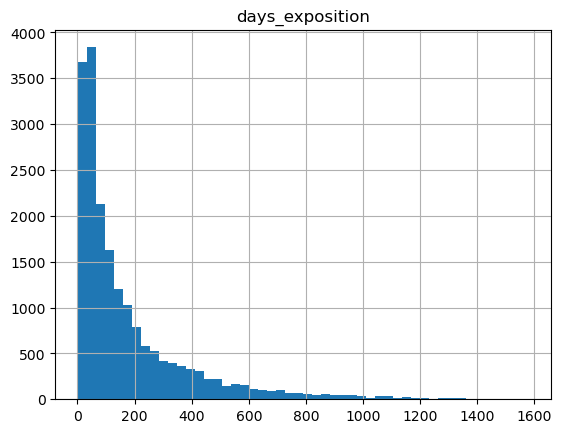

In [97]:
data.hist('days_exposition', bins = 50)

In [98]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

178.65250925009119
95.0


**Выводы**:
- Рассчитанное среднее количество дней говорит о том, что обычно квартира должна продаваться примерно за 178 дней - почти за полгода. Однако медианное значение равно 95 дням, это значит, что чаще всего квартира продается примерно за три месяца. Эту же зависимость мы можем видеть на гистограмме: количество квартир стремительно падает при увеличении срока объявления с 0 до 200 дней, затем снижается медленнее и держится примерно на одном уровне. 
- Можно сказать, что быстрая продажа - это продажа, которая заняла менее 3 месяцев.
- Необычно долгие продажи - те, что длятся более года.

### Факторы влияющие на стоимость объекта <a id="factors"></a> 

Исходя из предыдущих пунктов, можно выделить основные факторы, влияющие на стоимость объекта:
- закономерно, квартиры с большей площадью имеют большую итоговую стоимость, однако на цену квадратного метра площадь не влияет;
- цена за квадратный метр в квартирах до 6 комнат различается незначительно, большой скачок наблюдается в квартирах с семью комнатами - более чем на 30 тыс рублей;
- у квартир, расположенных на первом этаже, наблюдается самая низкая цена за квадратный метр - ~80 тыс рублей, чуть выше цена за квадратный метр у квартир на последнем этаже - ~87 тыс рублей. Самые высокие цены за квадратный метр у квартир на средних этажах - в среднем ~100 тыс рублей.
- Связь между ценой квартиры и днем недели или месяцем объявления о продаже не наблюдается. Наибольшая цена за квадратный метр была в 2014 году, затем к 2016 наблюдается спад и плавный рост к 2019 году.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений <a id="average_price"></a> 

Построим сводную таблицу, где индексами будут названия населенных пунктов, а значениями медианная цена за квадратный метр, отсортируем по убывающему количеству объявлений в этих населенных пунктах и выведем первые десять.

In [99]:
top_locality_name_price = data.pivot_table(index = 'locality_name', values = 'price_psm', aggfunc = ['median', 'count'])
top_locality_name_price.columns = ['median', 'count']
top_locality_name_price = top_locality_name_price.sort_values(by = 'count', ascending = False).head(10)
print(top_locality_name_price)
print()
print('Средняя цена:', round(top_locality_name_price['median'].mean()), 'рубля')
print()
print(data.loc[data['price_psm'] == data['price_psm'].max(), 'locality_name'])
print(data.loc[data['price_psm'] == data['price_psm'].min(), 'locality_name'])


                          median  count
locality_name                          
Санкт-Петербург    103664.122137  14497
поселок Мурино      83333.333333    494
поселок Шушары      76666.666667    427
Кудрово             95026.041667    424
Всеволожск          65789.473684    379
Пушкин              99744.245524    353
Колпино             74729.185405    332
поселок Парголово   91917.591125    319
Гатчина             67671.510409    300
Выборг              58307.692308    227

Средняя цена: 81685 рубля

2593    Санкт-Петербург
Name: locality_name, dtype: object
13893    поселок станции Свирь
Name: locality_name, dtype: object


**Выводы**:
- Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - 81685 рубля.
- Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург.
- Населённый пункт с самой низкой стоимостью квадратного метра - поселок станции Свирь.

###  Средняя цена каждого километра квартир в Санкт-Петербурге <a id="Kilo_average_price_spb"></a> 

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и составим сводную таблицу, где индексами будут расстояния до центра в километрах, а значениями цена за квадратный метр. Отсортируем по расстоянию и добавим столбец с разницами в цене. Вычислим среднее по новому столбцу difference.

In [100]:
distance_to_center_spb_price = data.query('locality_name == "Санкт-Петербург"').reset_index(drop = True)
distance_to_center_spb_price = distance_to_center_spb_price.pivot_table(index = 'distance_to_center_km', values = ['price_psm']).sort_values(by = 'distance_to_center_km', ascending = False)

distance_to_center_spb_price['difference'] = distance_to_center_spb_price['price_psm'].diff()
print(distance_to_center_spb_price)
print('Цена каждого километра относительно квадратного метра квартиры:', round(distance_to_center_spb_price['difference'].mean()))

                           price_psm    difference
distance_to_center_km                             
29.0                    72953.365445           NaN
28.0                    81161.915320   8208.549875
27.0                   132115.709459  50953.794140
26.0                    87798.872892 -44316.836567
25.0                    89828.531966   2029.659073
24.0                    84962.459210  -4866.072756
23.0                    92459.086881   7496.627671
22.0                    91269.886731  -1189.200150
21.0                    94394.169562   3124.282830
20.0                    87214.901385  -7179.268177
19.0                    98622.662920  11407.761536
18.0                    96758.211188  -1864.451733
17.0                    96778.746390     20.535202
16.0                   100271.429435   3492.683046
15.0                   103792.161178   3520.731742
14.0                   103622.196166   -169.965012
13.0                   107715.571642   4093.375476
12.0                   107365.3

Исходя из вычислений выше, разницу в цене квартиры в зависимости от приближения к центру можно вычислить следующим образом:
**(*стоимость квадратного метра* + 1705) * *количество квадратных метров* = *стоимость такой же квартиры приближенной к центру на 1 км***

Построим диаграмму динамики цен относительно удаленности от центра города.

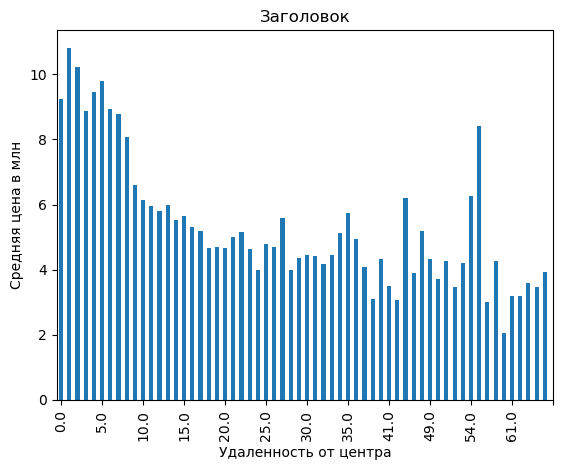

In [101]:
final_data = data.loc[data['locality_name'] == 'Санкт-Петербург']
final_data = data.groupby(by = 'distance_to_center_km')['last_price'].mean()
final_data = final_data / 1000000
final_data.plot(x = 'distance_to_center_km', y = 'last_price', kind = 'bar')
plt.xlabel("Удаленность от центра")
plt.ylabel("Средняя цена в млн")
plt.title('Заголовок')
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
plt.xticks (ticks=x_ticks);

## Общий вывод <a id="conclusion"></a> 

##### Ход работы
- Предобработка данных:
    - заполнение пропусков;
    - смена типов данных;
    - избавление от неявных дубликатов;
    - избавление от выбывающихся значений.
    - добавление в данные дополнительных столбцов для дальнейшей работы.
- Проведен исследовательский анализ данных:
    - подробно изучены столбцы и взаимосвязи между ними;
    - изучено, сколько в среднем занимает продажа квартиры;
    - выявлены факторы, влияющие на итоговую стоимость квартиры;
    - подсчитана цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
    - подсчитана средняя цену каждого километра при приближении к центру города.
- Составлен общий вывод.

#### Площади и количество комнат
- 1-комнатных и 2-комнатных квартир выставлено на продажу больше всего (более 7 тыс объявлений для каждой группы).
- Площадь кухни: чаще всего площадь кухни составляет примерно от 5 до 15 кв м, больше всего - 10 кв м.. Не зависит от других параметров, не увеличивается при увеличении жилой и общей площади.
- Жилая площадь: имеет четкую прямо пропорциональную связь с общей площадью и количеством комнат. Это коррелирует с предыдущим выводом. Имеет два пика количества квартир, ~18 и ~30 кв м.
- Общая площадь: пик количества квартир приходится на площадь 45 кв м.

#### Высота потолков
- В среднем высота потолков составляет 2.7 метра, во всех категориях квартир высота потолков примерно одинакова, в группе квартир до 10 этажей встречаются более высокие потолки.

#### Расстояния
- В данных о расстояниях много пропусков, вероятнее всего потому что данные рассчитываются системой. Объект (центр города, парк, аэропорт) может просто отсутствовать вблизи квартиры, а значит и указывать в этой колонке нечего.
- Центр:
    - Больше всего квартир расположено на расстоянии 10-15 км от центра.
    - Ближе всего к центру расположены квартиры в Санкт-Петербурге. Вероятнее всего все остальные населенные пункты, в которых есть данные по расстоянию до центра ориентируются именно на центр Санкт-Петербурга. К примеру, Шушары, Парголово, Стрельна, действительно находятся ближе к городу.
- Аэропорт:
    - Данные так же подтверждают гипотезу, поселок Александровская и поселок Шушары на картах действительно находятся ближе всего к аэропорту Пулково, а поселок Моложежное дальше всего. Значит, ориентация в данных идет по Пулково, а квартиры с отсутствующими данными просто находятся вне радиуса поиска.
- Парки:
    - Здесь населенных пунктов с данными несколько меньше, но можно сказать, что это самые "зеленые" населенные пункты ЛО. В каждом находятся крупные парки, на которые и идет ориентация.

#### Даты объявления
- В данных больше всего объявлений о продаже квартир за 2017 и 2018 года.
- Больше всего объявлений выложено в следующие месяцы: февраль, март, апрель, ноябрь.
- Объявления чаще выкладывают в будние дни.
- Рассчитанное среднее количество дней говорит о том, что обычно квартира должна продаваться примерно за 178 дней - почти за полгода. Однако медианное значение равно 95 дням, это значит, что чаще всего квартира продается примерно за три месяца. Эту же зависимость мы можем видеть на гистограмме: количество квартир стремительно падает при увеличении срока объявления с 0 до 200 дней, затем снижается медленнее и держится примерно на одном уровне.
- Можно сказать, что быстрая продажа - это продажа, которая заняла менее 3 месяцев. Необычно долгие продажи - те, что длятся более года.

#### Цены
- Больше всего квартир продается по цене ~4 млн рублей.
- Средняя цена квартиры в Санкт-Петербурге и Ленинградской области ~5,5 млн рублей.
- Цена за квадратный метр в квартирах до 6 комнат различается незначительно, большой скачок наблюдается в квартирах с семью комнатами - более чем на 30 тыс рублей.
- Цена за квадратный метр чаще всего примерно 100 тыс. рублей и практически не имеет связи с параметрами площади.
- Связь между ценой квартиры и днем недели или месяцем объявления о продаже не наблюдается.
- Наибольшая цена за квадратный метр была в 2014 году, затем к 2016 наблюдается спад и плавный рост к 2019 году.

##### Факторы, влияющие на цены
- Квартиры с низкими потолками можно найти в любой ценовой категории, цены за квадратный метр квартир с высокими потолками начинаются в среднем от 100 тыс рублей.
- Среди квартир, находящихся на этажах с первого по десятый, чаще встречается более высокая цена. Это может быть связано с тем, что в центре и приближенных к нему районах Петербурга меньше высоких зданий.
- Так же, как и в предыдущем выводе, часто встречаются высокие цены на квартиры в зданиях до 10 этажей. У квартир в домах этажностью от 1 до 21 в среднем наблюдается плавный рост в цене за квадратный метр квартиры.
- У квартир, расположенных на первом этаже, наблюдается самая низкая цена за квадратный метр - ~80 тыс рублей, чуть выше цена за квадратный метр у квартир на последнем этаже - ~87 тыс рублей. Самые высокие цены за квадратный метр у квартир на средних этажах - в среднем ~100 тыс рублей.
- Есть зависимость между количеством этажей в здании и ценой за квадратный метр: ниже всего в 1 и 2 этажных зданиях, выбиваются значения с 6, 7, 8, 11 и 13 этажами, у квартир в зданиях выше 9 этажей - стабильное плато цен за квадратный метр, вероятно, потому что это типовый застройки.
- Закономерно, квартиры с большей площадью имеют большую итоговую стоимость, однако на цену квадратного метра площадь не влияет.
- Цена за квадратный метр в квартирах до 6 комнат различается незначительно, большой скачок наблюдается в квартирах с семью комнатами - более чем на 30 тыс рублей.
- На итоговую цену квартиры влияет ее расстояние до центра Санкт-Петербурга. На расстоянии 10 километров средняя цена квартир уже на четверть ниже.
##### Населенные пункты
- Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 82963 рубля.
- Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург.
- Населённый пункт с самой низкой стоимостью квадратного метра - поселок станции Свирь.
##### Формула разницы в цене квартиры в зависимости от приближения к центру
- (стоимость квадратного метра + 1705) * количество квадратных метров = стоимость такой же квартиры приближенной к центру на 1 км